# Finding Outliers

In this exercise, you'll practice looking for outliers. You'll look at the World Bank GDP and population data sets. First, you'll look at the data from a one-dimensional perspective and then a two-dimensional perspective.

Run the code below to import the data sets and prepare the data for analysis. The code:
* reads in the data sets
* reshapes the datasets to a long format
* uses back fill and forward fill to fill in missing values
* merges the gdp and population data together
* shows the first 10 values in the data set

In [25]:
import pandas as pd
import numpy as np

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# see what the data looks like
df_2016.head(10)

,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14789,Arab World,2016,2.500164e+12,406452690.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0


# Exercise

Explore the data set to identify outliers using the Tukey rule. Follow the TODOs.

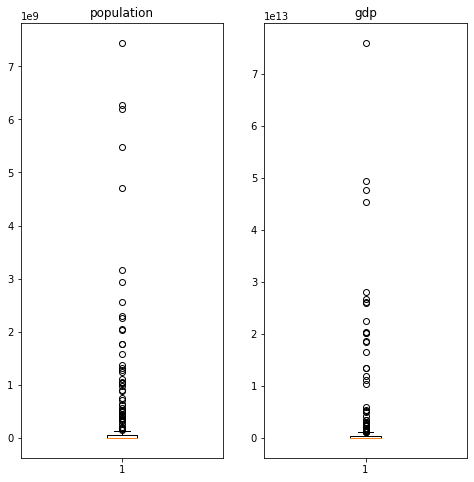

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots(1,2,figsize = (8,8))
# TODO: Make a boxplot of the population data for the year 2016
ax[0].boxplot(df_2016['population'])
ax[0].set_title('population')
# TODO: Make a boxplot of the gdp data for the year 2016
ax[1].boxplot(df_2016['gdp'])
ax[1].set_title('gdp')
plt.show()

Use the Tukey rule to determine what values of the population data are outliers for the year 2016. The Tukey rule finds outliers in one-dimension. The steps are:

* Find the first quartile (ie .25 quantile)
* Find the third quartile (ie .75 quantile)
* Calculate the inter-quartile range (Q3 - Q1)
* Any value that is greater than Q3 + 1.5 * IQR is an outlier
* Any value that is less than Qe - 1.5 * IQR is an outlier

In [27]:
# TODO: Filter the data for the year 2016 and put the results in the population_2016 variable. You only need
# to keep the Country Name and population columns
population_2016 = df_2016[['Country Name','population']]

# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = population_2016['population'].quantile(.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = population_2016['population'].quantile(.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14789,Arab World,4.064527e+08
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14843,East Asia & Pacific (excluding high income),2.053299e+09
14844,Early-demographic dividend,3.170658e+09
14845,East Asia & Pacific,2.298727e+09
14846,Europe & Central Asia (excluding high income),4.132349e+08
14847,Europe & Central Asia,9.116863e+08
14850,Euro area,3.406174e+08


Many of these aren't countries at all but rather aggregates of various countries. Notice as well that the min_value calculated above was negative. According to the Tukey rule, there are no minimum population outliers in this data set. If you were going to study how population and gdp correlate, you might want to remove these aggregated regions from the data set.

Next, use the Tukey method to do the same analysis for gdp.

In [28]:
# TODO: Filter the data for the year 2016 and put the results in the gdp_2016 variable. You only need
# to keep the Country Name and population columns
gdp_2016 = df_2016[['Country Name','gdp']]

# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = gdp_2016['gdp'].quantile(.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = gdp_2016['gdp'].quantile(.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers


,Country Name,gdp
14789,Arab World,2.500164e+12
14795,Australia,1.208039e+12
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14818,Central Europe and the Baltics,1.313067e+12
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14843,East Asia & Pacific (excluding high income),1.350933e+13
14844,Early-demographic dividend,1.043743e+13
14845,East Asia & Pacific,2.251217e+13


Clearly many of these outliers are due to regional data getting aggregated together. 

Remove these data points and redo the analysis. There's a list provided below of the 'Country Name' values that are not actually countries.

In [29]:
# TODO: remove the rows from the data that have Country Name values in the non_countries list
# Store the filter results back into the df_2016 variable

non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]

In [30]:
# TODO: Re-rerun the Tukey code with this filtered data to find population outliers
# TODO: Filter the data for the year 2016 and put the results in the population_2016 variable. You only need
# to keep the Country Name and population columns
population_2016 = df_2016[['Country Name','population']]

# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = population_2016['population'].quantile(.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = population_2016['population'].quantile(.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14825,"Congo, Dem. Rep.",7.873615e+07
14837,Germany,8.234867e+07
14849,"Egypt, Arab Rep.",9.568868e+07
14854,Ethiopia,1.024032e+08
14859,France,6.685977e+07
14863,United Kingdom,6.559556e+07
14888,Indonesia,2.611155e+08


In [31]:
# TODO: Re-rerun the Tukey code with this filtered data to find gdp outliers in 2016
# TODO: Filter the data for the year 2016 and put the results in the gdp_2016 variable. You only need
# to keep the Country Name and population columns
gdp_2016 = df_2016[['Country Name','gdp']]

# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = gdp_2016['gdp'].quantile(.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = gdp_2016['gdp'].quantile(.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers



,Country Name,gdp
14791,Argentina,5.548609e+11
14795,Australia,1.208039e+12
14796,Austria,3.908000e+11
14799,Belgium,4.675455e+11
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14819,Switzerland,6.687453e+11
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14852,Spain,1.237255e+12


Next, write code to determine which countries are in the population_outliers array and in the gdp_outliers array. 

In [32]:
# TODO: Find country names that are in both the population_outliers and the gdp_outliers 
# HINT: you can use the pandas intersection() method and python set() and list() methods
not_outliers = set(population_outliers['Country Name']) & set(gdp_outliers['Country Name']) 


These countries have both relatively high populations and high GDPs. That might be an indication that although these countries have high values for both gdp and population, they're not true outliers when looking at these values from a two-dimensional perspective.

Now write code to find countries in population_outliers but not in the gdp_outliers. 

In [33]:
# TODO: Find country names that are in the population outliers list but not the gdp outliers list
# HINT: Python's set() and list() methods should be helpful
pop_ol = list(set(population_outliers['Country Name']) - not_outliers)
pop_ol

['Egypt, Arab Rep.',
 'Vietnam',
 'Philippines',
 'Congo, Dem. Rep.',
 'Bangladesh',
 'Pakistan',
 'Ethiopia']

These countries are population outliers but not GDP outliers. If looking at outliers from a two-dimensional perspective, there's some indication that these countries might be outliers.

And finally, write code to find countries that are in the gdp_outliers array but not the population_outliers array.

In [34]:
# TODO: Find country names that are in the gdp outliers list but not the population outliers list
# HINT: Python's set() and list() methods should be helpful

gdp_ol= list(set(gdp_outliers['Country Name']) - not_outliers)
gdp_ol

['Venezuela, RB',
 'Sweden',
 'Australia',
 'Austria',
 'Korea, Rep.',
 'Netherlands',
 'Spain',
 'Belgium',
 'Saudi Arabia',
 'Canada',
 'Switzerland',
 'Poland',
 'Argentina']

On the other hand, these countries have high GDP but are not population outliers.


# Demo: 2-Dimensional Analysis

Next, look at the data from a two-dimensional perspective. You don't have to do anything in this section other than run the code cells below. This gives a basic example of how outlier removal affects machine learning algorithms.

The next code cell plots the GDP vs Population data including the country name of each point.

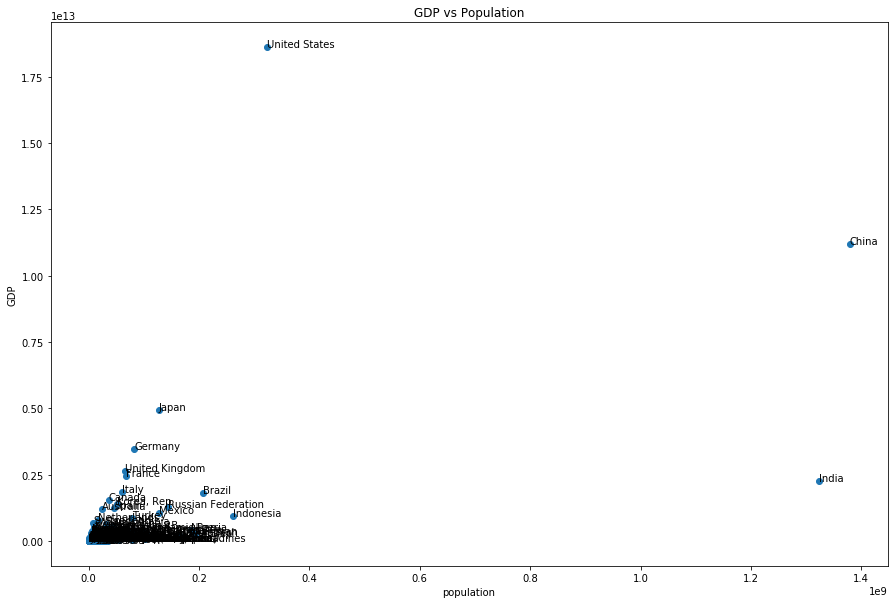

In [35]:
# run the code cell below
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

The United States, China, and India have such larger values that it's hard to see this data. Let's take those countries out for a moment and look at the data again.

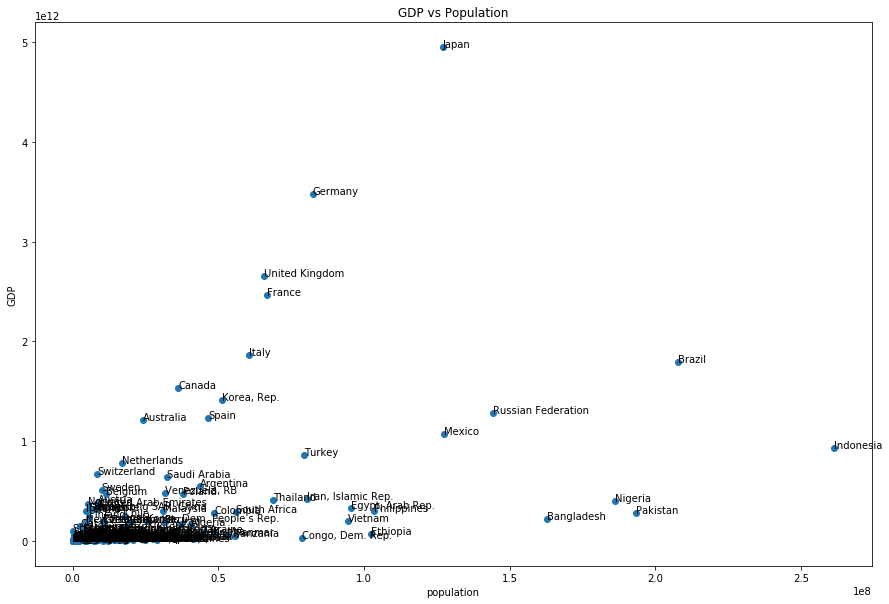

In [36]:
# Run the code below to see the results 
df_no_large = (df_2016['Country Name'] != 'United States') & (df_2016['Country Name'] != 'India') & (df_2016['Country Name'] != 'China')
x = list(df_2016[df_no_large]['population'])
y = list(df_2016[df_no_large]['gdp'])
text = df_2016[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

Run the code below to build a simple linear regression model with the population and gdp data for 2016.

[[6.54170378e+12]]


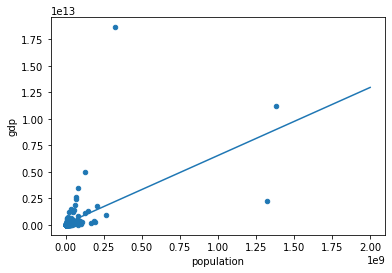

In [50]:
from sklearn.linear_model import LinearRegression

# fit a linear regression model on the population and gdp data
model = LinearRegression()
model.fit(df_2016['population'].values.reshape(-1, 1), df_2016['gdp'].values.reshape(-1, 1))
# .values.reshape(n,1), because n is unknow, can use -1 to substitute

# plot the data along with predictions from the linear regression model
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))

df_2016.plot('population', 'gdp', kind='scatter')
plt.plot(inputs, predictions);
print(model.predict([[1000000000]])) # model.predict should use a 2D array, [[1000000000]]


Notice that the code ouputs a GDP value of 6.54e+12 when population equals 1e9. Now run the code below when the United States is taken out of the data set.

[[5.25824554e+12]]


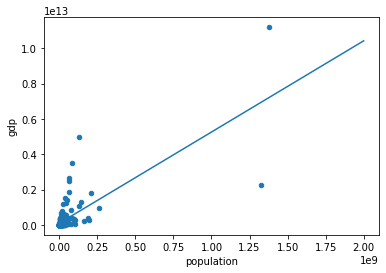

In [51]:
# Remove the United States to see what happens with the linear regression model
df_2016[df_2016['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')
# plt.plot(inputs, predictions)
model.fit(df_2016[df_2016['Country Name'] != 'United States']['population'].values.reshape(-1, 1), 
          df_2016[df_2016['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)
print(model.predict([[1000000000]]))

Notice that the code now ouputs a GDP value of 5.26e+12 when population equals 1e9. In other words, removing the United States shifted the linear regression line down.

# Conclusion

Data scientists sometimes have the task of creating an outlier removal model. In this exercise, you've used the Tukey rule. There are other one-dimensional models like eliminating data that is far from the mean. There are also more sophisticated models that take into account multi-dimensional data.

Remember, however, that this is a course on data engineering. As a data engineer, your job will be to remove outliers using code based on whatever model you're given.

If you were using the Tukey rule, for example, you'd calculate Q1, Q3, and IQR on your training data. You'd need to store these results. Then as new data comes in, you'd use these stored values to eliminate any outliers.

# Eliminating Outliers

Eliminating outliers is a big topic. There are many different ways to eliminate outliers. A data engineer's job isn't necessarily to decide what counts as an outlier and what does not. A data scientist would determine that. The data engineer would code the algorithms that eliminate outliers from a data set based on any criteria that a data scientist has decided.

In this exercise, you'll write code to eliminate outliers based on the Tukey rule.

Run the code cell below to read in the data and visualize the data.

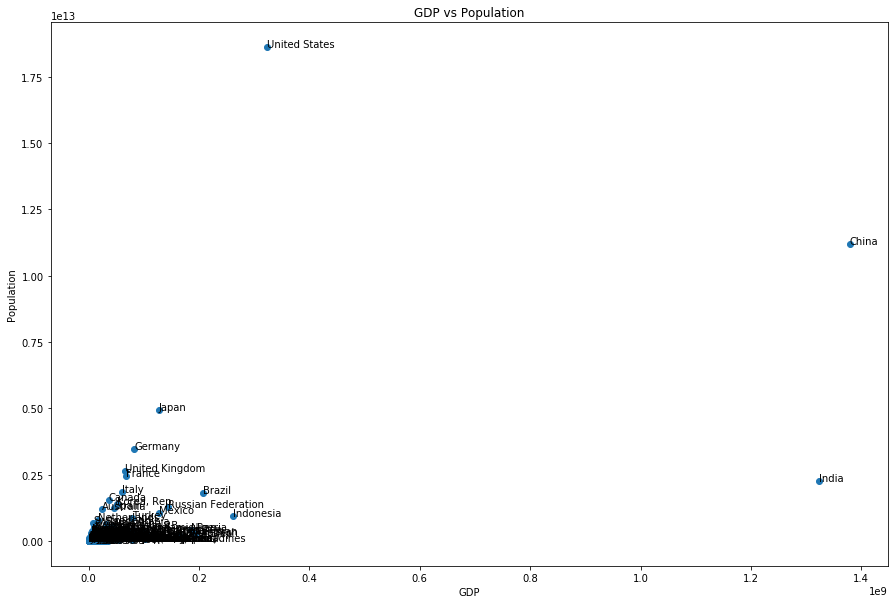

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]


# plot the data
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

# Exercise

Write a function that uses the Tukey rule to eliminate outliers from an array of data.

In [54]:
# TODO: Write a function that uses the Tukey rule to detect outliers in a dataframe column 
# and then removes that entire row from the data frame. For example, if the United States 
# is detected to be a GDP outlier, then remove the entire row of United States data.
# The function inputs should be a data frame and a column name.
# The output is a data_frame with the outliers eliminated

# HINT: Re-use code from the previous exercise

def tukey_rule(data_frame, column_name):
    
    Q1 = data_frame[column_name].quantile(.25)
    Q3 = data_frame[column_name].quantile(.75)
    IQR = Q3 - Q1
    max_value = Q3 + IQR * 1.5
    min_value = Q1 - IQR * 1.5
    
    data_frame = data_frame[(data_frame[column_name] <= max_value) & 
                            (data_frame[column_name] >= min_value)]
        
    return data_frame


Now use the function to eliminate population outliers and then gdp outliers from the dataframe. Store results in the df_outlier_removed variable.

In [55]:
# TODO: Use the tukey_rule() function to make a new data frame with gdp and population outliers removed
# Put the results in the df_outlier_removed variable

df_outlier_removed = df_2016.copy()
df_outlier_removed = tukey_rule(df_outlier_removed, 'population')
df_outlier_removed = tukey_rule(df_outlier_removed, 'gdp')


Run the code cell below to plot the results.

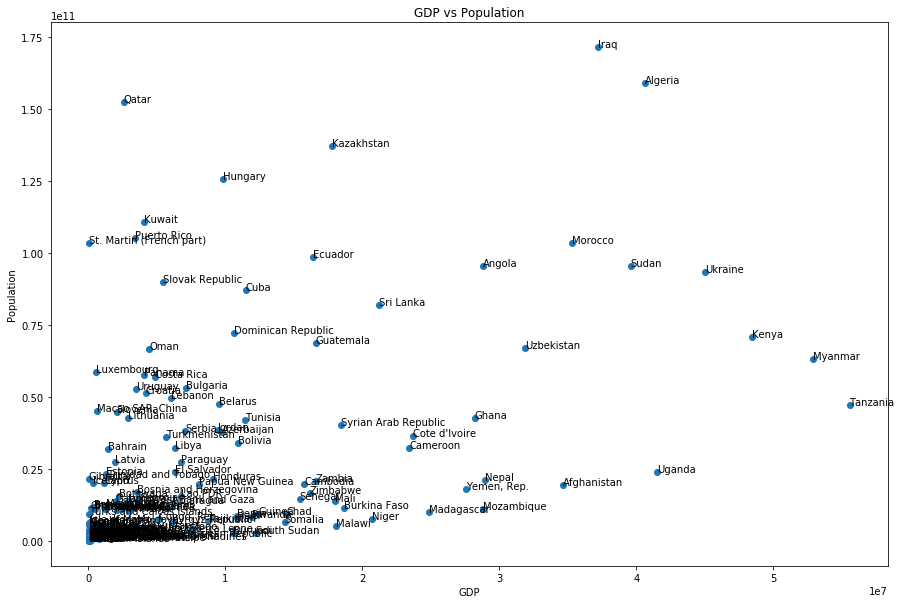

In [56]:
# plot the data
x = list(df_outlier_removed['population'])
y = list(df_outlier_removed['gdp'])
text = df_outlier_removed['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

# Scaling Data

In this exercise, you'll practice scaling data. Sometimes, you'll see the terms **standardization** and **normalization** used interchangeably when referring to feature scaling. However, these are slightly different operations. Standardization refers to scaling a set of values so that they have a mean of zero and a standard deviation of one. Normalization refers to scaling a set of values so that the range if between zero and one.

In this exercise, you'll practice implementing standardization and normalization in code. There are libraries, like scikit-learn, that can do this for you; however, in data engineering, you might not always have these tools available.

Run this first cell to read in the World Bank GDP and population data. This code cell also filters the data for 2016 and filters out the aggregated values like 'World' and 'OECD Members'.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]


# show the first ten rows
print('first ten rows of data')
df_2016.head(10)

first ten rows of data


,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0
14794,Antigua and Barbuda,2016,1.460145e+09,100963.0


# Exercise - Normalize the Data

To normalize data, you take a feature, like gdp, and use the following formula

$x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}$

where 
* x is a value of gdp
* x_max is the maximum gdp in the data
* x_min is the minimum GDP in the data

First, write a function that outputs the x_min and x_max values of an array. The inputs are an array of data (like the GDP data). The outputs are the x_min and x_max values

In [63]:
def x_min_max(data):
    # TODO: Complete this function called x_min_max() 
    # The input is an array of data as an input 
    # The outputs are the minimum and maximum of that array
    minimum = min(data)
    maximum = max(data)
    return [minimum, maximum]

# this should give the result (36572611.88531479, 18624475000000.0)
x_min_max(df_2016['gdp'])

[36572611.88531479, 18624475000000.0]

Next, write a function that normalizes a data point. The inputs are an x value, a minimum value, and a maximum value. The output is the normalized data point

In [62]:
def normalize(x, x_min, x_max):
    # TODO: Complete this function
    # The input is a single value 
    # The output is the normalized value
    return (x - x_min) / (x_max - x_min)

Why are you making these separate functions? Let's say you are training a machine learning model and using normalized GDP as a feature. As new data comes in, you'll want to make predictions using the new GDP data. You'll have to normalize this incoming data. To do that, you need to store the x_min and x_max from the training set. Hence the x_min_max() function gives you the minimum and maximum values, which you can then store in a variable.

A good way to keep track of the minimum and maximum values would be to use a class. In this next section, fill out the Normalizer() class code to make a class that normalizes a data set and stores min and max values. 

In [86]:
class Normalizer():
    # TODO: Complete the normalizer class
    # The normalizer class receives a dataframe as its only input for initialization
    # For example, the data frame might contain gdp and population data in two separate columns
    # Follow the TODOs in each section
    
    def __init__(self, dataframe):
        
        # TODO: complete the init function. 
        # Assume the dataframe has an unknown number of columns like [['gdp', 'population']] 
        # iterate through each column calculating the min and max for each column
        # append the results to the params attribute list
        
        # For example, take the gdp column and calculate the minimum and maximum
        # Put these results in a list [minimum, maximum]
        # Append the list to the params variable
        # Then take the population column and do the same
        
        # HINT: You can put your x_min_max() function as part of this class and use it
        
        # HINT: Use a for loop to iterate through the columns of the dataframe
        self.dataframe = dataframe
        self.params = []
        for col in dataframe.columns:
            self.params.append(list(x_min_max(self.dataframe[col])))
            
    def x_min_max(data):
        # TODO: complete the x_min_max method
        # HINT: You can use the same function defined earlier in the exercise
        minimum = None
        maximum = None
        return minimum, maximum

    def normalize_data(self, x):
        # TODO: complete the normalize_data method
        # The function receives a data point as an input and then outputs the normalized version
        # For example, if an input data point of [gdp, population] were used. Then the output would
        # be the normalized version of the [gdp, population] data point
        # Put the results in the normalized variable defined below
        
        # Assume that the columns in the dataframe used to initialize an object are in the same
        # order as this data point x
        
        # HINT: You cannot use the normalize_data function defined earlier in the exercise.
        # You'll need to iterate through the individual values in the x variable. A for loop and the 
        #    Python enumerate method might be useful.
        # Use the params attribute where the min and max values are stored 
        normalized = []
        for i,val in enumerate(x):
            normalized.append((val - self.params[i][0]) / (self.params[i][1] - self.params[i][0]))
        return normalized

Run the code cells below to check your results

In [87]:
gdp_normalizer = Normalizer(df_2016[['gdp', 'population']])

In [88]:
# This cell should output: [(36572611.88531479, 18624475000000.0), (11097.0, 1378665000.0)]
gdp_normalizer.params

[[36572611.88531479, 18624475000000.0], [11097.0, 1378665000.0]]

In [89]:
# This cell should output [0.7207969507229194, 0.9429407193285986]
gdp_normalizer.normalize_data([13424475000000.0, 1300000000])

[0.7207969507229194, 0.9429407193285986]

# Conclusion

When normalizing or standardizing features for machine learning, you'll need to store the parameters you used to do the scaling. That way you can scale new data points when making predictions. In this exercise, you stored the minimum and maximum values of a feature. When standardizing data, you would need to store the mean and standard deviation. The standardization formula is:

$x_{standardized} = \frac{x - \overline{x}}{S}$